In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
stops = pd.read_csv('data/stops.txt')

In [13]:
stops

,stop_id,stop_name,stop_lat,stop_lon,location_type,parent_station
0,1100006,"Zell (Wiesental), Bahnhof",47.704632,7.847772,NaN,NaN
1,1100008,"Zell (Wiesental), Wilder Mann",47.710084,7.859648,NaN,NaN
2,1100009,"Zell (Wiesental), Grönland",47.713191,7.862909,NaN,NaN
3,1100010,Atzenbach,47.714624,7.872341,NaN,NaN
4,1100011,"Mambach, Brücke",47.728209,7.877470,NaN,NaN
...,...,...,...,...,...,...
35890,8778400,Perpignan,42.695942,2.879397,NaN,NaN
35891,8780099,Lamarche Centre,48.070833,5.782500,NaN,NaN
35892,8780111,Vezelise J. Leclerc,48.486666,6.093749,NaN,NaN
35893,8792902,Vallon-Pnt-d'Arc Gare Routière,44.405537,4.397631,NaN,NaN


#### NaN values
location_type and parent station have to many NaN to be used.

In [14]:
# Calculate number of NaN
def NaN_percentage(df):
    '''
    Returns a df with columnname and their respective number of NaN and what percentage this corresponds to.
    Args:
        df = movies, characters
    '''
    
    n_NaN = []
    perc_NaN = []
    length = len(df)

    for column in df:
        i_nan = df[column].isna().sum()
        perc_nan = i_nan/ length
        n_NaN.append(i_nan)
        perc_NaN.append(perc_nan)

    # Create df with results
    index_df = df.columns.to_list()
    df_NaN = pd.DataFrame({'number of NaN':n_NaN, 'percentage of NaN':perc_NaN}, index= index_df )
    return df_NaN
NaN_percentage(stops)

,number of NaN,percentage of NaN
stop_id,0,0.000000
stop_name,0,0.000000
stop_lat,0,0.000000
stop_lon,0,0.000000
location_type,34474,0.960412
parent_station,30938,0.861903


***
#### unique values
id is indeed unique, stop_name alone is not unique -> we have to use id

In [41]:
# Calculate number of NaN
def unique_percentage(df):
    '''
    Returns a df with columnname and their respective number of NaN and what percentage this corresponds to.
    Args:
        df = movies, characters
    '''
    
    n_unique = []
    perc_unique = []
    length = len(df)

    for column in df:
        i_unique = len(df[column].unique())
        perc = i_unique/ length
        n_unique.append(i_unique)
        perc_unique.append(perc)

    # Create df with results
    index_df = df.columns.to_list()
    df_unique = pd.DataFrame({'number of unique values':n_unique, 'percentage of unique values':perc_unique}, index= index_df )
    return df_unique
df_unique = unique_percentage(stops)
df_unique

,number of unique values,percentage of unique values
stop_id,35895,1.000000
stop_name,30717,0.855746
stop_lat,32961,0.918262
stop_lon,29595,0.824488
location_type,2,0.000056
parent_station,1422,0.039616


The stops with not unique stop name:

In [46]:
'number of non unique names', df_unique.iloc[0,0] - df_unique.iloc[1,0], '(Names can be counted multiple times)'

('number of non unique names', 5178)

In [49]:
# Extract names of stop which are not unique
non_unique_stopname = stops['stop_name'][stops.stop_name.duplicated()].unique()
non_unique_stopname

array(['Lindau Hbf', 'Enzisweiler', 'Wasserburg (Bodensee)', ...,
       'Annemasse', 'St-Germain-de-Joux', 'Vallorcine (F)'], dtype=object)

In [53]:
len(non_unique_stopname), 'stops share the stop_name with another stop_id'

(1642, 'stops share the stop_name with another stop_id')

**Some stops that share their name share the same parent station. But not all -> 86.5 %. Parent stop_id usually ends with P. The 'child' stop ids are often with an additional :0:1, :0:1, :0:2 or some letters :0:D, :0:F, :0:G**

In [54]:
stops[stops.stop_name == 'Annemasse']

,stop_id,stop_name,stop_lat,stop_lon,location_type,parent_station
35736,8774549,Annemasse,46.199338,6.236401,NaN,8774549P
35737,8774549:0:D,Annemasse,46.199835,6.236401,NaN,8774549P
35738,8774549:0:F,Annemasse,46.199960,6.236401,NaN,8774549P
35739,8774549:0:G,Annemasse,46.199773,6.236401,NaN,8774549P
35740,8774549P,Annemasse,46.199338,6.236401,1.0,NaN


In [61]:
stops[stops.stop_name == 'Enzisweiler']

,stop_id,stop_name,stop_lat,stop_lon,location_type,parent_station
3206,8002373:0:2,Enzisweiler,47.564206,9.665432,NaN,8002373P
3207,8002373P,Enzisweiler,47.564145,9.665432,1.0,NaN


In [62]:
stops[stops.stop_name == 'St-Germain-de-Joux']

,stop_id,stop_name,stop_lat,stop_lon,location_type,parent_station
3094,1401227,St-Germain-de-Joux,46.178138,5.737683,NaN,NaN
35747,8774572,St-Germain-de-Joux,46.176757,5.740944,NaN,NaN


In [123]:
stops[stops.stop_name == 'Muggensturm']

,stop_id,stop_name,stop_lat,stop_lon,location_type,parent_station
3253,8014241,Muggensturm,48.876802,8.274292,NaN,8014241P
3254,8014241:0:1,Muggensturm,48.876861,8.274292,NaN,8014241P
3255,8014241:0:2,Muggensturm,48.876920,8.274292,NaN,8014241P
3256,8014241P,Muggensturm,48.876802,8.274292,1.0,NaN


In [76]:
# Df of stops whose stop_name is not unique
df_non_unique_stopname = stops[stops.stop_name.isin(non_unique_stopname)]
df_non_unique_stopname

,stop_id,stop_name,stop_lat,stop_lon,location_type,parent_station
545,1101316,"Büsingen, Bürgerhaus",47.696210,8.687841,NaN,NaN
546,1101323,"Büsingen, Schifflände",47.696924,8.693518,NaN,NaN
549,1101327,"Büsingen, Wiesli",47.690998,8.681561,NaN,NaN
746,1101622,"Konstanz, Sternenplatz",47.667380,9.179363,NaN,NaN
754,1101633,"Konstanz, Zähringerplatz",47.672685,9.183693,NaN,NaN
...,...,...,...,...,...,...
35747,8774572,St-Germain-de-Joux,46.176757,5.740944,NaN,NaN
35780,8774687,Vallorcine (F),46.033405,6.933988,NaN,8774687P
35781,8774687:0:A,Vallorcine (F),46.033530,6.933988,NaN,8774687P
35782,8774687:0:B,Vallorcine (F),46.033467,6.933988,NaN,8774687P


In [104]:
check_parent = df_non_unique_stopname.groupby('stop_name').count()
check_parent

,stop_id,stop_lat,stop_lon,location_type,parent_station
stop_name,,,,,
Aadorf,3,3,3,1,2
Aalen,3,3,3,1,2
Aarau,12,12,12,1,11
"Aarau, Bahnhof",7,7,7,1,6
Aarburg-Oftringen,4,4,4,1,3
...,...,...,...,...,...
Zürich Tiefenbrunnen,4,4,4,1,3
Zürich Wiedikon,5,5,5,1,4
Zürich Wipkingen,3,3,3,1,2


In [112]:
perc_parent = check_parent.parent_station.apply(lambda x: x >0).sum() / len(check_parent)
'percentage of station stops with non unique name that have a parent_station', perc_parent

('percentage of station stops with non unique name that have a parent_station',
 0.8654080389768575)

***
**Check if spelling has an influence on statistics:**

lower -> perc. of unique values lowers a little bit: 0.8557 -> 0.8555 <br>
replacing special character -> perc. of unique values lowers a little bit: 0.85575 -> 0.85572 

In [127]:
stops_lower = stops.copy()
stops_lower.stop_name = stops.stop_name.apply(lambda x: x.lower())

In [129]:
unique_percentage(stops_lower)

In [137]:
# define dictionary of replacements
replacements = {'ü': 'u', 'ö': 'o', 'ä': 'a', 'é': 'e', 'è': 'e'}
# replace characters in dataframe using dictionary
stops_character = stops.replace(replacements,  regex=True)

In [138]:
stops_character

,stop_id,stop_name,stop_lat,stop_lon,location_type,parent_station
0,1100006,"Zell (Wiesental), Bahnhof",47.704632,7.847772,NaN,NaN
1,1100008,"Zell (Wiesental), Wilder Mann",47.710084,7.859648,NaN,NaN
2,1100009,"Zell (Wiesental), Gronland",47.713191,7.862909,NaN,NaN
3,1100010,Atzenbach,47.714624,7.872341,NaN,NaN
4,1100011,"Mambach, Brucke",47.728209,7.877470,NaN,NaN
...,...,...,...,...,...,...
35890,8778400,Perpignan,42.695942,2.879397,NaN,NaN
35891,8780099,Lamarche Centre,48.070833,5.782500,NaN,NaN
35892,8780111,Vezelise J. Leclerc,48.486666,6.093749,NaN,NaN
35893,8792902,Vallon-Pnt-d'Arc Gare Routiere,44.405537,4.397631,NaN,NaN


In [139]:
unique_percentage(stops_character)

,number of unique values,percentage of unique values
stop_id,35895,1.000000
stop_name,30716,0.855718
stop_lat,32961,0.918262
stop_lon,29595,0.824488
location_type,2,0.000056
parent_station,1422,0.039616


***
#### Check for outlier in lat/ lon

Rerference: Geneva
Latitude: 46.204391
Longitude: 6.143158

Schaffhausen
Lat: 47.711084, 
Lon: 8.613862

Scuol:
Lat: 46.726395
Lon: 10.403206

Chiasso:
Lat: 45.833735, 
Lon: 9.021814

Chancy:
Lat: 46.132425, 
Lon: 5.959816

In [144]:
print('max', stops.stop_lat.max())
print('min', stops.stop_lat.min())

max 54.314980686643
min 42.6570024815598


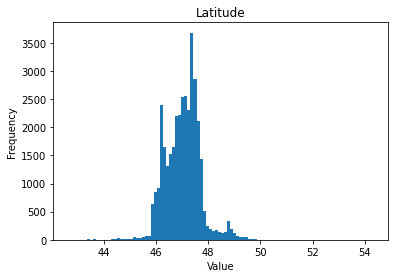

In [141]:
plt.hist(stops.stop_lat, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Latitude')
plt.show()

In [145]:
print('max', stops.stop_lon.max())
print('min', stops.stop_lon.min())

max 13.4345655873099
min -4.47981747415208


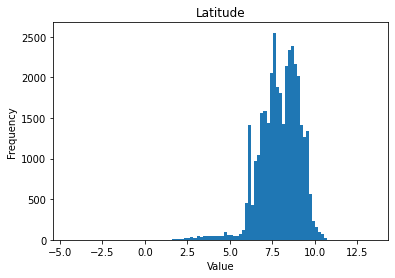

In [142]:
plt.hist(stops.stop_lon, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Latitude')
plt.show()